In [70]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from common import NWSL, Fonts, Images, Colors, add_twitter_handle

In [3]:
df = pd.read_csv("data/matches_with_temp.csv")
df

,date,time,home,away,local_std_time,day,avg_temp
0,2024-03-16,13:00:00,KCC,POR,11:00:00,03-16,52.4
1,2024-03-16,16:00:00,LOU,ORL,15:00:00,03-16,61.2
2,2024-03-16,19:00:00,NC,HOU,18:00:00,03-16,54.4
3,2024-03-16,19:30:00,UTA,CHI,16:30:00,03-16,52.2
4,2024-03-16,22:00:00,LA,BFC,18:00:00,03-16,59.0
...,...,...,...,...,...,...,...
177,2024-11-02,17:00:00,ORL,RGN,16:00:00,11-02,80.2
178,2024-11-02,19:30:00,NC,WAS,18:30:00,11-02,49.4
179,2024-11-02,21:30:00,HOU,BFC,19:30:00,11-02,64.6
180,2024-11-03,15:00:00,CHI,KCC,13:00:00,11-03,58.2


In [11]:
teams = (
    df.groupby("home")
    .agg(avg_temp=("avg_temp", "mean"))
    .sort_values(["avg_temp"], ascending=False)
    .reset_index()
)
teams

,home,avg_temp
0,HOU,80.846154
1,ORL,79.969231
2,LOU,74.984615
3,NJNY,73.230769
4,KCC,72.523077
5,NC,71.953846
6,WAS,71.538462
7,SD,69.123077
8,BFC,68.692308
9,LA,67.307692


In [72]:
vmin = math.floor(df["avg_temp"].min() / 5) * 5
vmax = math.ceil(df["avg_temp"].max() / 5) * 5
(vmin, vmax)

(40, 90)

<Figure size 576x720 with 0 Axes>

<Figure size 3200x4000 with 0 Axes>

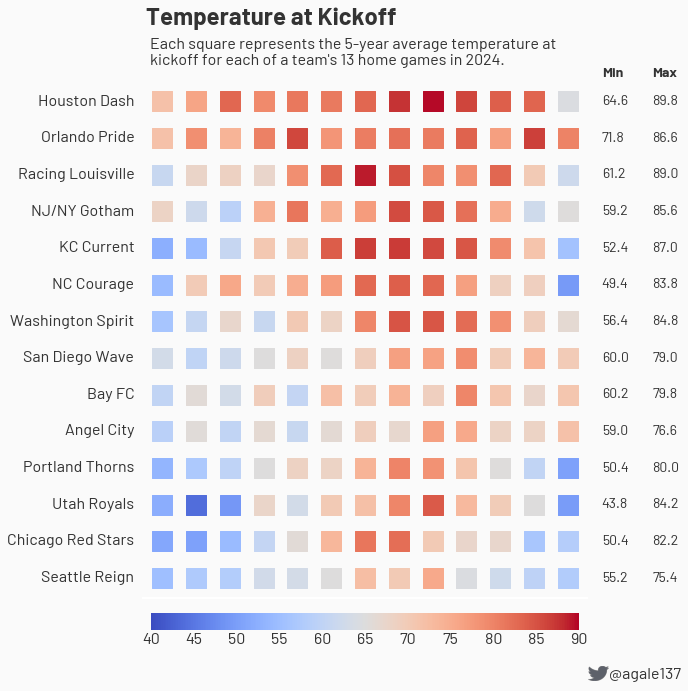

In [195]:
# General
plt.clf()
plt.rcParams["figure.figsize"] = (8, 10)
plt.figure(dpi=400, facecolor=Colors.WHITE)
fig, axs = plt.subplots(len(teams.index) + 1, 1)
fig.patch.set_facecolor(Colors.WHITE)

for i, row in teams.iterrows():
    ax = axs[i]
    ax.set_facecolor(Colors.WHITE)

    subset = df[df["home"] == row["home"]].reset_index(drop=True)
    scat = ax.scatter(
        subset.index,
        [1] * len(subset.index),
        c=subset["avg_temp"],
        marker="s",
        s=400,
        vmin=vmin,
        vmax=vmax,
        cmap="coolwarm",
    )
    
    if i == 0:
        ax.text(
            len(subset.index),
            1.1,
            "Min",
            ha="left",
            va="center",
            fontproperties=Fonts.BARLOW_BOLD,
            size=14,
            color=Colors.BLACK,
        )
        ax.text(
            len(subset.index) + 1.5,
            1.1,
            "Max",
            ha="left",
            va="center",
            fontproperties=Fonts.BARLOW_BOLD,
            size=14,
            color=Colors.BLACK,
        )

    ax.text(
        len(subset.index),
        1,
        subset["avg_temp"].min(),
        ha="left",
        va="center",
        fontproperties=Fonts.BARLOW,
        size=14,
        color=Colors.BLACK,
    )
    ax.text(
        len(subset.index) + 1.5,
        1,
        subset["avg_temp"].max(),
        ha="left",
        va="center",
        fontproperties=Fonts.BARLOW,
        size=14,
        color=Colors.BLACK,
    )

    # Add the colorbar at the bottom
    if i == len(teams.index) - 1:
        cbar_ax = axs[len(teams.index)]
        cbar = fig.colorbar(
            scat,
            ax=cbar_ax,
            orientation="horizontal",
            # ticks=list(range(int(vmin), int(vmax + 1), 5)),
            pad=0.5,
            fraction=0.56,
            aspect=25,
        )
        cbar_ax.spines[["top", "right", "bottom", "left"]].set_visible(False)
        cbar_ax.set_xticks([])
        cbar_ax.set_yticks([])
        cbar.ax.set_xticks(list(range(int(vmin), int(vmax + 1), 5)))
        cbar.ax.set_xticklabels(
            list(range(int(vmin), int(vmax + 1), 5)),
            fontsize=16,
            fontproperties=Fonts.BARLOW,
            color=Colors.BLACK,
        )
        cbar.ax.tick_params(labelsize=16, size=0)
        cbar.outline.set_visible(False)

    # Ticks
    ax.spines[["top", "right", "bottom", "left"]].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([])

    # Labels
    ax.set_ylabel(
        NWSL.name(row["home"]),
        rotation=0,
        ha="right",
        va="center",
        fontproperties=Fonts.BARLOW,
        size=16,
        color=Colors.BLACK,
    )

# Titles
plt.suptitle(
    "Temperature at Kickoff",
    x=0.35,
    y=0.99,
    fontproperties=Fonts.BARLOW_BOLD,
    fontsize=24,
    color=Colors.BLACK,
)
plt.figtext(
    0.14,
    0.91,
    "Each square represents the 5-year average temperature at\nkickoff for each of a team's 13 home games in 2024.",
    fontproperties=Fonts.BARLOW,
    fontsize=16,
    color=Colors.BLACK,
)

add_twitter_handle(fig, x=0.9, y=0.05, fs=16, w=0.03)

# Save image
plt.savefig(
    "temperature_at_kickoff.png",
    bbox_inches="tight",
    pad_inches=0.5,
    dpi=400,
)

In [15]:
df[df["home"] == "RGN"].reset_index(drop=True)

,date,time,home,away,local_std_time,day,avg_temp
0,2024-03-17,18:00:00,RGN,WAS,14:00:00,03-17,55.2
1,2024-04-21,18:00:00,RGN,CHI,14:00:00,04-21,57.4
2,2024-05-03,22:00:00,RGN,SD,18:00:00,05-03,58.0
3,2024-05-08,22:00:00,RGN,KCC,18:00:00,05-08,62.8
4,2024-05-19,18:00:00,RGN,ORL,14:00:00,05-19,63.2
5,2024-06-16,16:00:00,RGN,POR,12:00:00,06-16,65.0
6,2024-06-23,18:00:00,RGN,LOU,14:00:00,06-23,72.4
7,2024-07-07,18:00:00,RGN,UTA,14:00:00,07-07,70.2
8,2024-08-25,22:00:00,RGN,NC,18:00:00,08-25,75.4
9,2024-09-16,22:00:00,RGN,NJNY,18:00:00,09-16,64.6
